# Binary Classification with PyCaret - Diabetes Prediction

This notebook demonstrates a basic binary classification workflow using PyCaret to predict diabetes diagnosis.

**Dataset**: diabetes_dataset.csv  
**Target Variable**: diagnosed_diabetes (0 = No Diabetes, 1 = Diabetes)  
**Task**: Predict whether a patient has diabetes based on various health and lifestyle features

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pycaret.classification import *

## 2. Load the Dataset

In [2]:
# Load the diabetes dataset
df = pd.read_csv('diabetes_dataset.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (100000, 31)

First few rows:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
df = df.loc[:9999]

## 3. Explore the Data

In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 10000 non-null  int64  
 1   gender                              10000 non-null  object 
 2   ethnicity                           10000 non-null  object 
 3   education_level                     10000 non-null  object 
 4   income_level                        10000 non-null  object 
 5   employment_status                   10000 non-null  object 
 6   smoking_status                      10000 non-null  object 
 7   alcohol_consumption_per_week        10000 non-null  int64  
 8   physical_activity_minutes_per_week  10000 non-null  int64  
 9   diet_score                          10000 non-null  float64
 10  sleep_hours_per_day                 10000 non-null  float64
 11  screen_time_hours_per_day           10000 

In [7]:
# Statistical summary
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.06700,1.987400,118.735500,5.99190,6.982580,5.996530,0.218000,0.242000,0.079500,25.556390,...,186.160600,53.9713,103.181200,121.001100,111.139900,160.363300,8.972895,6.530181,30.163780,0.605400
std,15.62707,1.397296,83.693829,1.78804,1.107717,2.455265,0.412908,0.428316,0.270531,3.565246,...,31.855949,10.2270,33.382651,42.888554,13.608617,30.969899,4.925430,0.816933,9.087046,0.488789
min,18.00000,0.000000,0.000000,0.00000,3.200000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.0000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,4.600000,0.000000
25%,39.00000,1.000000,56.000000,4.80000,6.200000,4.300000,0.000000,0.000000,0.000000,23.100000,...,165.000000,47.0000,78.000000,92.000000,102.000000,139.000000,5.000000,5.970000,23.700000,0.000000
50%,50.00000,2.000000,100.000000,6.00000,7.000000,6.000000,0.000000,0.000000,0.000000,25.500000,...,186.000000,54.0000,102.000000,121.000000,111.000000,161.000000,8.685000,6.540000,28.900000,1.000000
75%,61.00000,3.000000,160.000000,7.20000,7.700000,7.700000,0.000000,0.000000,0.000000,28.000000,...,208.000000,61.0000,126.000000,150.000000,120.000000,181.000000,12.372500,7.080000,35.600000,1.000000
max,90.00000,9.000000,634.000000,10.00000,10.000000,15.000000,1.000000,1.000000,1.000000,38.200000,...,301.000000,96.0000,245.000000,283.000000,167.000000,272.000000,27.200000,9.530000,63.300000,1.000000


In [8]:
# Check target variable distribution
print("Target Variable Distribution:")
print(df['diagnosed_diabetes'].value_counts())
print("\nPercentage:")
print(df['diagnosed_diabetes'].value_counts(normalize=True) * 100)

Target Variable Distribution:
diagnosed_diabetes
1    6054
0    3946
Name: count, dtype: int64

Percentage:
diagnosed_diabetes
1    60.54
0    39.46
Name: proportion, dtype: float64


In [9]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasti

## 4. Data Preparation

In [10]:
# Remove diabetes_stage column as it's directly related to target
# This prevents data leakage
if 'diabetes_stage' in df.columns:
    df = df.drop(columns=['diabetes_stage'])

print(f"Dataset shape after removing diabetes_stage: {df.shape}")

Dataset shape after removing diabetes_stage: (10000, 30)


## 5. Setup PyCaret Environment

This step initializes PyCaret and automatically handles:
- Train/test split
- Data preprocessing
- Feature encoding
- Missing value imputation

In [11]:
# Setup PyCaret classification environment
clf = setup(
    data=df,
    target='diagnosed_diabetes',
    session_id=123,  # For reproducibility
    train_size=0.8,
    normalize=True,
    ignore_features=['diabetes_risk_score'],  # Avoid data leakage - this is calculated from target
    verbose=True,
    log_experiment=False,  # Disable MLflow logging to avoid compatibility issues
    experiment_name='diabetes_classification'
)

,Description,Value
0,Session id,123
1,Target,diagnosed_diabetes
2,Target type,Binary
3,Original data shape,"(10000, 30)"
4,Transformed data shape,"(10000, 47)"
5,Transformed train set shape,"(8000, 47)"
6,Transformed test set shape,"(2000, 47)"
7,Ignore features,1
8,Numeric features,22
9,Categorical features,6


## 6. Compare Models

PyCaret will train and evaluate multiple classification algorithms automatically

In [12]:
# Compare all available models
best_models = compare_models(n_select=5, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9226,0.9444,0.8743,0.9976,0.9319,0.8433,0.8531,0.3140
rf,Random Forest Classifier,0.9224,0.9416,0.8743,0.9972,0.9317,0.8427,0.8526,0.1340
ada,Ada Boost Classifier,0.9219,0.9420,0.8751,0.9953,0.9313,0.8416,0.8510,0.0930
lightgbm,Light Gradient Boosting Machine,0.9215,0.9440,0.8749,0.9948,0.9310,0.8408,0.8502,0.3250
et,Extra Trees Classifier,0.8832,0.9369,0.8850,0.9192,0.9017,0.7580,0.7590,0.1230
dt,Decision Tree Classifier,0.8671,0.8581,0.9009,0.8822,0.8914,0.7203,0.7207,0.0380
lda,Linear Discriminant Analysis,0.8625,0.9352,0.8997,0.8766,0.8879,0.7102,0.7107,0.0430
ridge,Ridge Classifier,0.8622,0.9352,0.9005,0.8756,0.8878,0.7095,0.7101,0.0290
lr,Logistic Regression,0.8606,0.9353,0.8997,0.8740,0.8866,0.7060,0.7066,0.2390
nb,Naive Bayes,0.8576,0.9243,0.8699,0.8922,0.8809,0.7040,0.7045,0.0370


## 7. Select and Train the Best Model

In [13]:
# Get the best model (top performer)
best_model = best_models[0]
print(f"\nBest Model: {best_model}")


Best Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## 8. Tune the Best Model

Hyperparameter tuning to optimize model performance

In [14]:
# Tune hyperparameters of the best model
tuned_model = tune_model(best_model, optimize='Accuracy', n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9150,0.9317,0.8619,0.9976,0.9248,0.8283,0.8400
1,0.9262,0.9518,0.8804,0.9977,0.9354,0.8503,0.8593
2,0.9225,0.9443,0.8784,0.9930,0.9322,0.8426,0.8512
3,0.9212,0.9482,0.8781,0.9907,0.9310,0.8401,0.8484
4,0.9062,0.9346,0.8636,0.9789,0.9177,0.8098,0.8184
5,0.9150,0.9339,0.8698,0.9883,0.9253,0.8276,0.8367
6,0.9262,0.9515,0.8843,0.9930,0.9355,0.8501,0.8579
7,0.9188,0.9483,0.8760,0.9883,0.9288,0.8350,0.8432
8,0.9225,0.9557,0.8781,0.9930,0.9320,0.8427,0.8513


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## 9. Evaluate the Model

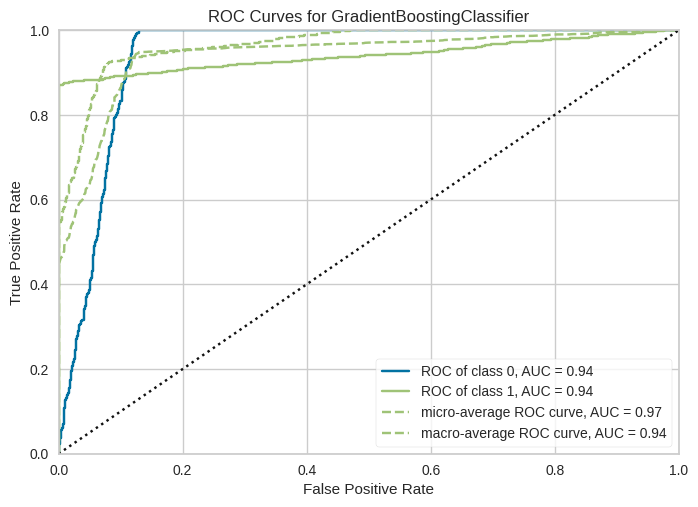

In [15]:
# Plot model performance - AUC curve
plot_model(tuned_model, plot='auc')

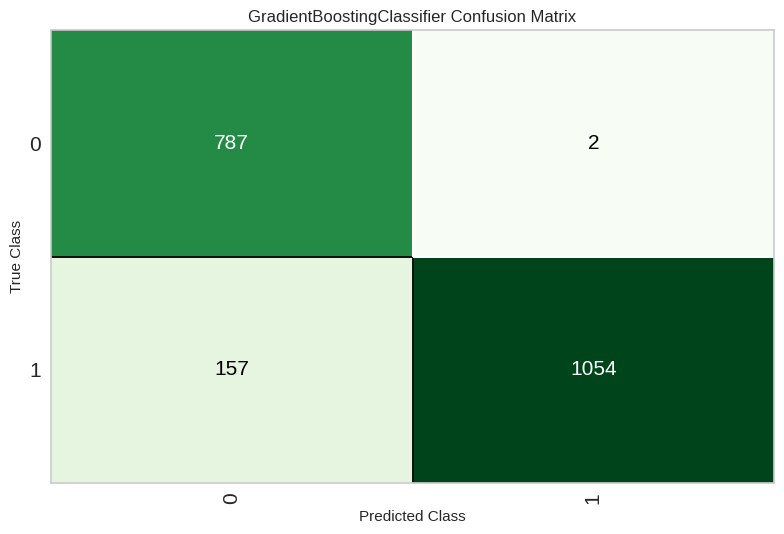

In [16]:
# Plot confusion matrix
plot_model(tuned_model, plot='confusion_matrix')

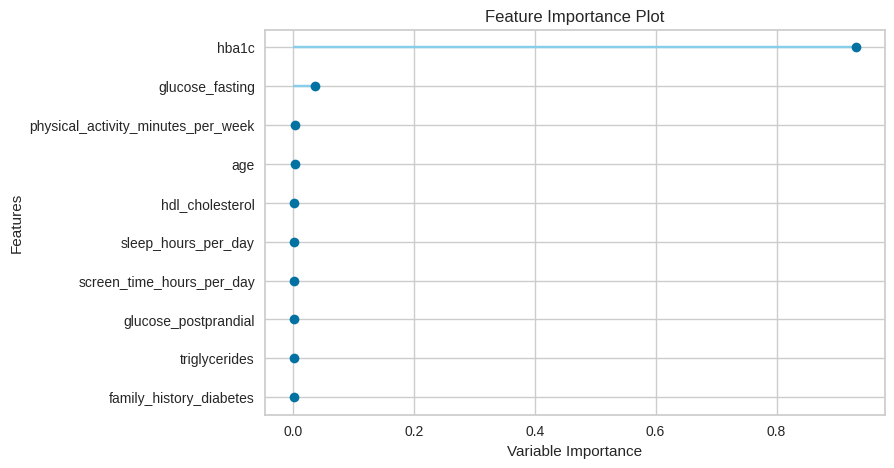

In [17]:
# Plot feature importance
plot_model(tuned_model, plot='feature')

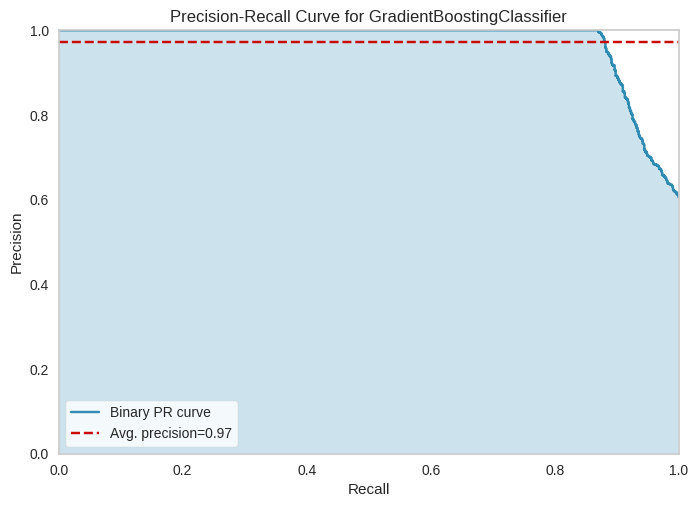

In [18]:
# Plot precision-recall curve
plot_model(tuned_model, plot='pr')

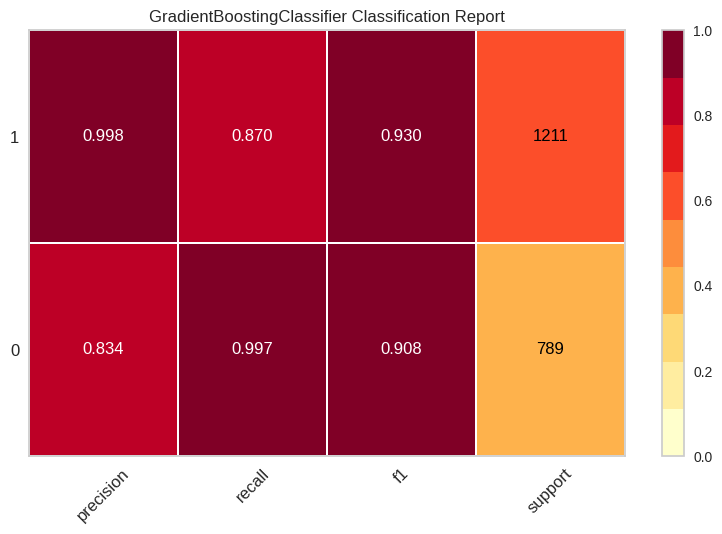

In [19]:
# Plot classification report
plot_model(tuned_model, plot='class_report')

## 10. Make Predictions

In [20]:
# Make predictions on test set
predictions = predict_model(tuned_model)
predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9205,0.9407,0.8704,0.9981,0.9299,0.8391,0.8496


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes,prediction_label,prediction_score
669,67,Female,White,No formal,Upper-Middle,Retired,Never,1,194,4.6,...,45,122,141,110,172,6.93,7.28,1,1,0.9974
3476,66,Female,White,Highschool,Low,Employed,Former,1,16,4.0,...,58,89,189,137,202,5.61,7.63,1,1,0.9969
9113,45,Female,Black,Graduate,Middle,Employed,Never,3,223,4.7,...,36,84,30,109,171,11.00,6.52,1,1,0.9971
8878,59,Male,Asian,Highschool,Middle,Unemployed,Current,2,125,5.0,...,58,69,192,139,196,13.31,7.98,1,1,0.9959
8746,48,Male,Hispanic,Postgraduate,Low,Employed,Never,3,79,6.7,...,62,60,59,107,126,5.83,5.83,0,0,0.8882
96,55,Male,White,Postgraduate,Lower-Middle,Retired,Current,3,142,7.4,...,66,54,161,87,92,4.77,4.78,0,0,0.8562
3869,66,Female,Asian,Graduate,Upper-Middle,Employed,Never,1,149,4.3,...,53,97,132,139,198,7.10,7.72,1,1,0.9972
2145,74,Male,Hispanic,Postgraduate,Middle,Employed,Never,2,154,9.4,...,64,85,40,116,125,12.12,5.69,0,0,0.8448
9742,27,Male,Other,Highschool,Upper-Middle,Retired,Never,2,255,5.7,...,52,72,97,85,116,5.46,5.58,0,0,0.8843
5880,18,Female,Hispanic,Postgraduate,Low,Employed,Current,1,92,5.7,...,58,118,149,85,154,2.00,5.90,0,0,0.8809


## 11. Finalize and Save the Model

In [21]:
# Finalize the model (train on entire dataset)
final_model = finalize_model(tuned_model)
print("Model finalized!")

Model finalized!


In [22]:
# Save the model
save_model(final_model, 'best_diabetes_classification_model')
print("Model saved successfully!")

Transformation Pipeline and Model Successfully Saved
Model saved successfully!


## 12. Load and Test the Saved Model (Optional)

In [23]:
# Load the saved model
loaded_model = load_model('best_diabetes_classification_model')
print("Model loaded successfully!")

Transformation Pipeline and Model Successfully Loaded
Model loaded successfully!


In [24]:
# Test prediction with sample data
sample_data = df.drop(columns=['diagnosed_diabetes']).head(5)
sample_predictions = predict_model(loaded_model, data=sample_data)
sample_predictions[['age', 'gender', 'bmi', 'glucose_fasting', 'hba1c', 'prediction_label', 'prediction_score']]

,age,gender,bmi,glucose_fasting,hba1c,prediction_label,prediction_score
0,58,Male,30.500000,136,8.18,1,0.9970
1,48,Female,23.100000,93,5.63,0,0.9055
2,60,Male,22.200001,118,7.51,1,0.9974
3,74,Female,26.799999,139,9.03,1,0.9971
4,46,Male,21.200001,137,7.20,1,0.9968


## Summary

In this notebook, we:
1. ✅ Loaded the diabetes dataset
2. ✅ Explored the data and checked for issues
3. ✅ Set up PyCaret for binary classification
4. ✅ Compared multiple machine learning models
5. ✅ Tuned the best performing model
6. ✅ Evaluated model performance with various plots
7. ✅ Made predictions on test data
8. ✅ Saved the final model for future use

**Next Steps:**
- Try different preprocessing techniques
- Experiment with feature engineering
- Handle class imbalance if needed
- Deploy the model for real-time predictions